***Auther : Hicran Arnold***

***MET CS 6999 Term Project***

***Model Creations- Iterations***

## Libraries Used 

In [129]:
# libraries 
# for data processing
import pandas as pd  # for reading and analyzing the data
#for  visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
#to split data into training and testing 
from sklearn.model_selection import train_test_split
##feature selection 
from sklearn.feature_selection import mutual_info_classif # attribute selection method I
from sklearn.feature_selection import chi2 # attribute selection method II
from sklearn.ensemble import RandomForestClassifier # attribute selection method III
from sklearn.feature_selection import SelectFromModel # for attribute selection method III
from mlxtend.feature_selection import SequentialFeatureSelector as SFS # for attribute selection method IV
##classifications
from sklearn.linear_model import LogisticRegression #clf1
from sklearn.tree import DecisionTreeClassifier #clf2
from sklearn.neighbors import KNeighborsClassifier#clf3
from sklearn import svm #clf4
from sklearn.neural_network import MLPClassifier#clf5
#accuracy measurement
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report
from sklearn import metrics
#data transformation 
from sklearn import preprocessing


## Reading and Splitting the Data 

In [214]:
# saving as df 
df= pd.read_csv("HicranArnold_project_intial.csv", index_col = False)
df.head()

,x.aidtst3,employ1,income2,weight2,height3,children,veteran3,blind,renthom1,sex1,...,x.denvst3,x.prace1,x.mrace1,x.exteth3,x.asthms1,x.michd,x.ltasth1,x.casthm1,x.state,havarth3
0,2.0,1.0,8.0,138.0,504.0,2.0,2.0,2.0,1.0,2,...,1,1,1,1,3,2.0,1,1,27,2
1,1.0,1.0,4.0,240.0,507.0,88.0,2.0,1.0,2.0,1,...,2,1,1,2,3,2.0,1,1,72,2
2,1.0,1.0,6.0,120.0,504.0,88.0,2.0,2.0,1.0,2,...,1,6,6,2,3,2.0,1,1,31,2
3,2.0,7.0,77.0,133.0,502.0,88.0,2.0,2.0,1.0,2,...,1,1,1,2,3,2.0,1,1,45,2
4,9.0,7.0,8.0,170.0,505.0,88.0,2.0,2.0,1.0,2,...,1,1,1,1,3,2.0,1,1,24,2


In [215]:
X = df.loc[ :,  ~df.columns.isin(['havarth3']) ]
y = df.loc[:, 'havarth3':'havarth3']

In [216]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.33 ,random_state = 42)
print("original data size ", df.shape)
print("training data size", X_train.shape)
print("testing data size ", X_test.shape)
# print(X_train.head())

original data size  (11933, 108)
training data size (7995, 107)
testing data size  (3938, 107)


## Saving Data Training and Test CSV Files

In [217]:
X_train_csv = X_train.copy()
X_train_csv["havarth3"]= y_train.copy()
X_train_csv.to_csv("HicranArnold_project_training.csv")

In [218]:
X_test_csv= X_test. copy()
X_test_csv["havarth3"]= y_test.copy()
X_test_csv.to_csv("HicranArnold_project_test.csv")

In [219]:
print("training data size", X_train.shape)
print("testing y data size ", y_train.shape)
print("testing data size ", X_test.shape)
print("testing y  data size ", y_test.shape)

training data size (7995, 107)
testing y data size  (7995, 1)
testing data size  (3938, 107)
testing y  data size  (3938, 1)


## Identifying Numeric and Categorical Features

In [136]:
import numpy as np
categ_data =[]
numeric_data = []
X_train_col = X_train.columns.to_list()
for column in X_train_col:
    unique_values = len(X_train[column].value_counts())
    if unique_values < 10:
        categ_data.append(column)
    else:
        numeric_data.append(column)
print("categorical data")    
print(categ_data)
print("numeric data")
print(numeric_data)

categorical data
['x.aidtst3', 'employ1', 'veteran3', 'blind', 'renthom1', 'sex1', 'marital', 'educa', 'deaf', 'decide', 'x.drnkdrv', 'flushot6', 'seatbelt', 'hivtst6', 'hivrisk5', 'pneuvac4', 'diffwalk', 'usenow3', 'diffdres', 'diffalon', 'smoke100', 'rmvteth4', 'lastden4', 'diabete3', 'hlthpln1', 'genhlth', 'dispcode', 'chckdny1', 'iyear', 'persdoc2', 'medcost', 'checkup1', 'exerany2', 'chcocncr', 'chccopd1', 'addepev2', 'chcscncr', 'asthma3', 'cvdstrk3', 'cvdinfr4', 'cvdcrhd4', 'qstver', 'qstlang', 'x.metstat', 'x.bmi5cat', 'x.age.g', 'x.raceg21', 'x.race.g1', 'x.age65yr', 'x.rfbmi5', 'x.chldcnt', 'x.educag', 'x.incomg', 'x.rfdrhv6', 'x.rfseat2', 'x.rfseat3', 'x.rfbing5', 'x.smoker3', 'x.rfsmok3', 'drnkany5', 'x.racegr3', 'x.race', 'x.urbstat', 'x.chispnc', 'x.rfhlth', 'x.dualuse', 'x.imprace', 'x.hispanc', 'x.phys14d', 'x.ment14d', 'x.hcvu651', 'x.totinda', 'x.denvst3', 'x.prace1', 'x.mrace1', 'x.exteth3', 'x.asthms1', 'x.michd', 'x.ltasth1', 'x.casthm1']
numeric data
['income2', '

In [137]:
numeric_var = ["weight2","height3","children","alcday5","x.psu","physhlth","menthlth","sleptim1","htin4","wtkg3","x.bmi5","htm4","x.drnkwek","drocdy3.","x.llcpwt2","x.llcpwt","x.wt2rake","x.ststr"
,"x.strwt","x.rawrake"]

categorical = X_train.loc[:, ~X_train.columns.isin(numeric_var)].columns.to_list()


In [138]:
list(set(numeric_data) - set(numeric_var))

['x.age80', 'imonth', 'x.ageg5yr', 'income2', 'iday', 'x.state', 'fmonth']

We have have only above differences. We know that dates are not count as numeric and ranges, state number not a numeric variable.We are now sure that our data is correct. 

## Iteration One

### Attribute Selection Method : Information Gain/Mutual Information

First attribute selection method is Information Gain/Mutual Information. This is a filtering method. It means we will use univariate statistics to pick our attributes and filter them based on their information gain. We will only select the ones with high information gain. 

In [139]:
X_train.columns

Index(['x.aidtst3', 'employ1', 'income2', 'weight2', 'height3', 'children',
       'veteran3', 'blind', 'renthom1', 'sex1',
       ...
       'x.totinda', 'x.denvst3', 'x.prace1', 'x.mrace1', 'x.exteth3',
       'x.asthms1', 'x.michd', 'x.ltasth1', 'x.casthm1', 'x.state'],
      dtype='object', length=107)

In [221]:
# takes df, return to df 
def mutualInfo(X_train, y_train, X_test):
    #initating the mututal info object
    mutual_info = mutual_info_classif(X_train, y_train.values.ravel(), random_state=42)
    #coverting to series
    mutual_info = pd.Series(mutual_info)
    #renaming index with column names
    mutual_info.index = X_train.columns
    #sorting
    mutual_info.sort_values(ascending=False)
    #mutual_info.between(0.1,1 ) because we do not want the one that has zero rate
    #filtering the data with only selected attributes
    mutual_info[mutual_info.between(0.01,1 )].sort_values(ascending=False).plot.bar(figsize=(8, 8))
    X_train_reduced= X_train[mutual_info[mutual_info.between(0.01,1 )].sort_values(ascending=False)[0:20].index.to_list()]
    X_test_reduced = X_test[mutual_info[mutual_info.between(0.01,1 )].sort_values(ascending=False)[0:20].index.to_list()]
    return X_train_reduced, X_test_reduced


new size X_train (7995, 20)
new size X_train (3938, 20)
selected column names Index(['x.age80', 'x.ageg5yr', 'x.age.g', 'employ1', 'diffwalk', 'x.hcvu651',
       'genhlth', 'x.age65yr', 'marital', 'x.phys14d', 'physhlth', 'rmvteth4',
       'pneuvac4', 'x.rfhlth', 'x.ststr', 'x.exteth3', 'persdoc2', 'qstver',
       'x.strwt', 'chccopd1'],
      dtype='object')


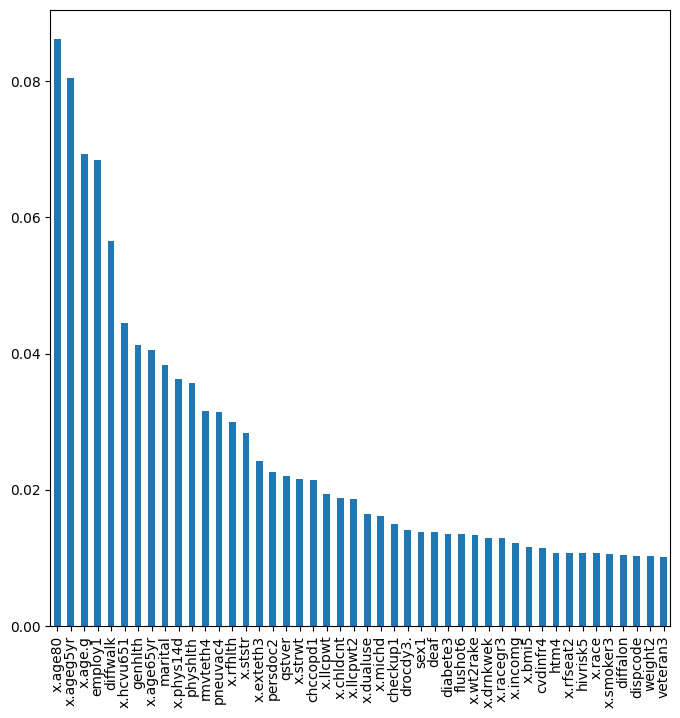

In [222]:
# reduced data set 1
X_train_reduced1 , X_test_reduced1= mutualInfo(X_train, y_train, X_test)
print("new size X_train",X_train_reduced1.shape )
print("new size X_train",X_test_reduced1.shape )
print("selected column names",X_test_reduced1.columns)

### Model Creation : Initializing 5 models

#### Model 1:Logistic Regression

**Classifier  1- Logistic Regression**

In [224]:
def lRMaker(X_train, y_train, X_test):
    # instantiate the model (using the default parameters)
    m = LogisticRegression (solver='lbfgs', max_iter=1000,random_state=16) # initialize lr
    m.fit(X_train,y_train.values.ravel())# fit the training data to train the data
    y_pred = m.predict(X_test) # use test data to predict
    print(y_pred)
    return m, y_pred
    

In [225]:
def printAccuracy(y_test, y_pred):
        print(y_pred)
        cm = confusion_matrix(y_test, y_pred)
        TP, FP, FN, TN = cm.ravel() 
        group_names = ["TP", "FP", "FN", "TN"]
        group_counts = ["{0:0.0f}".format(value) for value in
                        cm.flatten()]
        group_percentages = ["{0:.2%}".format(value) for value in
                                cm.flatten()/np.sum(cm)]
        labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
                zip(group_names,group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)
        sns.heatmap(cm, annot=labels, fmt='', cmap='mako')
        P = TP+FP
        N= FN+ TN
        TPR_log = TP/P
        TNR_log = TN /N 

        my_accuracy_score_log= accuracy_score(y_test, y_pred)
        my_matrix_values_1 = {"TN":TN, "FP":FP, "FN":FN, "TP":TP,"Accuracy":my_accuracy_score_log,
                        "Sensitivity: TPR":TPR_log,"Specificity: TNR":TNR_log}
        result_of_m = pd.DataFrame(my_matrix_values_1 , index=[0])
        print(result_of_m)
        #return my_accuracy_score_log
        print('Log loss = {:.5f}'.format(log_loss(y_test, y_pred)))
        print('AUC = {:.5f}'.format(roc_auc_score(y_test, y_pred)))
        print('Average Precision = {:.5f}'.format(average_precision_score(y_test, y_pred)))
        print('\nUsing 0.5 as threshold:')
        print('Accuracy = {:.5f}'.format(accuracy_score(y_test, y_pred)))
        print('Precision = {:.5f}'.format(precision_score(y_test, y_pred)))
        print('Recall = {:.5f}'.format(recall_score(y_test, y_pred)))
        print('F1 score = {:.5f}'.format(f1_score(y_test, y_pred)))
        print('\nClassification Report')
        print(classification_report(y_test, y_pred))
        print("Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is 'specificity'.")
        return result_of_m


In [229]:
m1_lr, m1_y_pred_lr= lRMaker(X_train=X_train_reduced1, y_train=y_train, X_test=X_test_reduced1)

[1 2 1 ... 2 2 1]


[1 2 1 ... 2 2 1]
     TN   FP   FN   TP  Accuracy  Sensitivity: TPR  Specificity: TNR
0  2212  785  418  523  0.694515          0.399847          0.841065
Log loss = 11.97184
AUC = 0.62046
Average Precision = 0.29001

Using 0.5 as threshold:
Accuracy = 0.69451
Precision = 0.55579
Recall = 0.39985
F1 score = 0.46510

Classification Report
              precision    recall  f1-score   support

           1       0.56      0.40      0.47      1308
           2       0.74      0.84      0.79      2630

    accuracy                           0.69      3938
   macro avg       0.65      0.62      0.63      3938
weighted avg       0.68      0.69      0.68      3938

Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is 'specificity'.


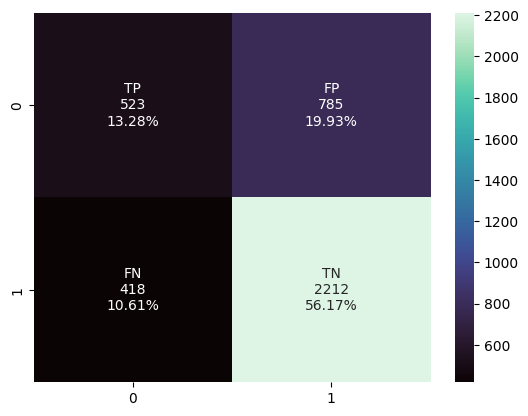

In [230]:
m1_lr_result = printAccuracy(y_test, m1_y_pred_lr)

#### Model 2:Decision Tree Classifier

***Classifier 2-Decision Tree Classifier***

In [231]:
def dTMaker(X_train, y_train, X_test):
    #max_depth to control the size of the tree to prevent overfitting
    m = DecisionTreeClassifier(max_depth=3, random_state=42)
    m = m.fit(X_train, y_train.values.ravel())
    y_pred = m.predict(X_test)
    return m , y_pred

In [232]:
m2_dt, m2_y_pred_dt  = dTMaker (X_train=X_train_reduced1, y_train=y_train, X_test=X_test_reduced1)

[2 2 1 ... 2 2 1]
     TN   FP   FN   TP  Accuracy  Sensitivity: TPR  Specificity: TNR
0  2276  652  354  656   0.74454          0.501529          0.865399
Log loss = 11.97184
AUC = 0.68346
Average Precision = 0.27758

Using 0.5 as threshold:
Accuracy = 0.74454
Precision = 0.64950
Recall = 0.50153
F1 score = 0.56601

Classification Report
              precision    recall  f1-score   support

           1       0.65      0.50      0.57      1308
           2       0.78      0.87      0.82      2630

    accuracy                           0.74      3938
   macro avg       0.71      0.68      0.69      3938
weighted avg       0.73      0.74      0.73      3938

Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is 'specificity'.


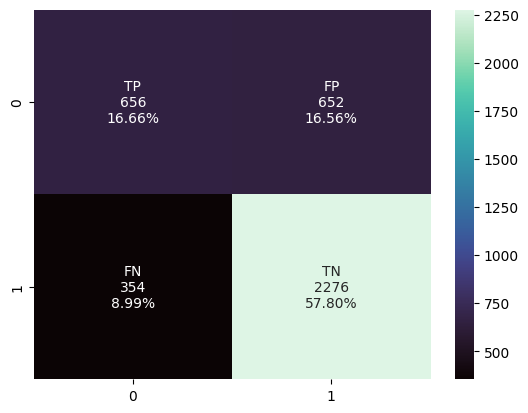

In [234]:
# printing dt result 
m2_dt_result = printAccuracy(y_test, m2_y_pred_dt)

#### Model 3 : K-Nearest Neighbors Classifier (KNN)

In [235]:
def kNNMaker(X_train,y_train,X_test):
    scaler =preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled= scaler.transform(X_test)
    m = KNeighborsClassifier(n_neighbors=9)
    m.fit(X_train_scaled, y_train.values.ravel())
    y_pred_knn= m.predict(X_test_scaled)
    return m , y_pred_knn

In [236]:
m3_knn, m3_y_pred_knn  = kNNMaker(X_train=X_train_reduced1, y_train=y_train, X_test=X_test_reduced1)

[1 2 1 ... 2 1 1]
     TN   FP   FN   TP  Accuracy  Sensitivity: TPR  Specificity: TNR
0  2203  627  427  681  0.732351          0.520642          0.837643
Log loss = 11.97184
AUC = 0.67914
Average Precision = 0.27913

Using 0.5 as threshold:
Accuracy = 0.73235
Precision = 0.61462
Recall = 0.52064
F1 score = 0.56374

Classification Report
              precision    recall  f1-score   support

           1       0.61      0.52      0.56      1308
           2       0.78      0.84      0.81      2630

    accuracy                           0.73      3938
   macro avg       0.70      0.68      0.69      3938
weighted avg       0.72      0.73      0.73      3938

Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is 'specificity'.


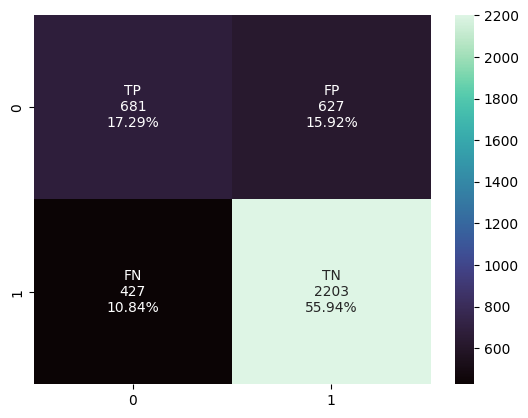

In [237]:
m3_knn_result = printAccuracy(y_test, m3_y_pred_knn)

#### Model 4 :Support vector machine (SVM)

***Classifier 4 : Support vector machine (SVM)***

In [239]:
def sVMMaker(X_train,y_train,X_test ):
    scaler =preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled= scaler.transform(X_test)
    m= svm.SVC(random_state=0)
    m = m.fit(X_train_scaled, y_train.values.ravel())
    y_pred_svm= m.predict(X_test_scaled)
    return m, y_pred_svm

In [240]:
m4_svm, m4_y_pred_svm  = sVMMaker(X_train=X_train_reduced1, y_train=y_train, X_test=X_test_reduced1)

[2 2 1 ... 2 2 1]
     TN   FP   FN   TP  Accuracy  Sensitivity: TPR  Specificity: TNR
0  2351  690  279  618  0.753936          0.472477          0.893916
Log loss = 11.97184
AUC = 0.68320
Average Precision = 0.27663

Using 0.5 as threshold:
Accuracy = 0.75394
Precision = 0.68896
Recall = 0.47248
F1 score = 0.56054

Classification Report
              precision    recall  f1-score   support

           1       0.69      0.47      0.56      1308
           2       0.77      0.89      0.83      2630

    accuracy                           0.75      3938
   macro avg       0.73      0.68      0.69      3938
weighted avg       0.75      0.75      0.74      3938

Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is 'specificity'.


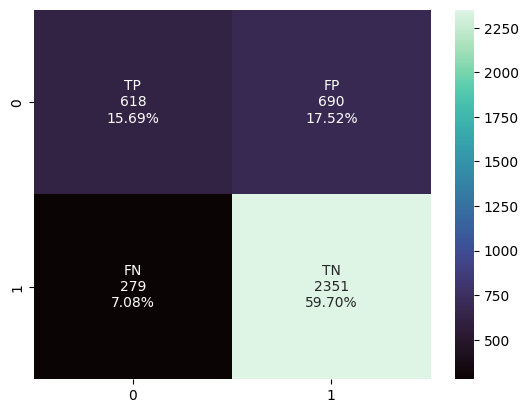

In [241]:
m4_svm_result = printAccuracy(y_test, m4_y_pred_svm)

#### Model 5 neural_network.MLPClassifie

***Classifier 5: neural_network.MLPClassifier***

In [242]:
def mLPMaker(X_train,X_test, y_train):
    scaler =preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled= scaler.transform(X_test)
    m = MLPClassifier(random_state=0, max_iter=1).fit(X_train_scaled, y_train.values.ravel())
    y_pred_mlp= m.predict(X_test_scaled)
    return m, y_pred_mlp


In [243]:
m5_mlp , m5_y_pred_mlp  = mLPMaker(X_train=X_train_reduced1, y_train=y_train, X_test=X_test_reduced1)

/home/harnold/github/2018_BRFSS_survey_data_anlaysis/env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


[2 2 1 ... 2 2 1]
     TN   FP   FN   TP  Accuracy  Sensitivity: TPR  Specificity: TNR
0  2302  681  328  627  0.743779          0.479358          0.875285
Log loss = 11.97184
AUC = 0.67732
Average Precision = 0.27808

Using 0.5 as threshold:
Accuracy = 0.74378
Precision = 0.65654
Recall = 0.47936
F1 score = 0.55413

Classification Report
              precision    recall  f1-score   support

           1       0.66      0.48      0.55      1308
           2       0.77      0.88      0.82      2630

    accuracy                           0.74      3938
   macro avg       0.71      0.68      0.69      3938
weighted avg       0.73      0.74      0.73      3938

Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is 'specificity'.


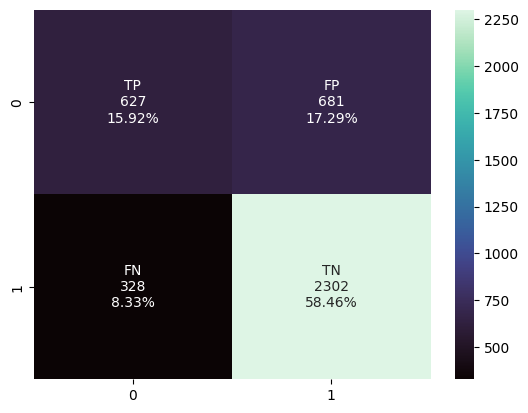

In [244]:
m5_mlp_result = printAccuracy(y_test, m5_y_pred_mlp)

## Iteration 2

### Attribute Selection Method : Chi-square Test

In [158]:

def chiFeatures(X_train,numeric_var, y_train):
    X_categorical= X_train.loc[ :,  ~X_train.columns.isin(numeric_var)]
    f_p_values=chi2(X_categorical,y_train)
    # highier the p value lower the importance
    # A p-value less than 0.05 is typically considered to be statistically significant
    p_values=pd.Series(f_p_values[1])
    p_values.index=X_categorical.columns
    p_values.sort_values(ascending=False, inplace=True)
    column_name= p_values.index.to_list()
    values= p_values.values.tolist()
    data= pd.DataFrame(data=values,columns=['p_values'] ) # 0000001
    data["featureNames"] = column_name
    # this will eliminate our features to 20
    cat= data[data["p_values"]>0.00000000000000000000000001].featureNames.to_list()
    len(cat)
    return cat

def dropCorr(categorical_var, X_train,X_test ):
    # categorical elimination
    X_train_reduced= X_train.loc[ :,  ~X_train.columns.isin(categorical_var) ]
    X_test_reduced = X_test.loc[ :,  ~X_test.columns.isin(categorical_var) ]
    return X_train_reduced, X_test_reduced

In [159]:
categorical_var = chiFeatures(X_train,numeric_var, y_train)
X_train_reduced2, X_test_reduced2= dropCorr(categorical_var, X_train,X_test )
print("new size X_train",X_train_reduced2.shape )
print("new size X_train",X_test_reduced2.shape )
print("selected column names",X_train_reduced2.columns)

new size X_train (7995, 37)
new size X_train (3938, 37)
selected column names Index(['employ1', 'income2', 'weight2', 'height3', 'children', 'x.drnkdrv',
       'pneuvac4', 'alcday5', 'rmvteth4', 'x.psu', 'physhlth', 'menthlth',
       'genhlth', 'sleptim1', 'qstver', 'htin4', 'wtkg3', 'x.bmi5', 'htm4',
       'x.age.g', 'x.age80', 'x.ageg5yr', 'x.chldcnt', 'x.drnkwek', 'drocdy3.',
       'x.race', 'x.llcpwt2', 'x.llcpwt', 'x.dualuse', 'x.wt2rake', 'x.ststr',
       'x.strwt', 'x.rawrake', 'x.phys14d', 'x.hcvu651', 'x.prace1',
       'x.mrace1'],
      dtype='object')


### Model Creation : Initializing 5 models

#### Model 6 : Logistic Regression

In [245]:
m6_lr, m6_y_pred_lr= lRMaker(X_train=X_train_reduced2, y_train=y_train, X_test=X_test_reduced2)

[2 2 2 ... 2 2 2]


[2 2 2 ... 2 2 2]
     TN    FP  FN  TP  Accuracy  Sensitivity: TPR  Specificity: TNR
0  2630  1308   0   0  0.667852               0.0               1.0
Log loss = 11.97184
AUC = 0.50000
Average Precision = 0.33215

Using 0.5 as threshold:
Accuracy = 0.66785
Precision = 0.00000
Recall = 0.00000
F1 score = 0.00000

Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1308
           2       0.67      1.00      0.80      2630

    accuracy                           0.67      3938
   macro avg       0.33      0.50      0.40      3938
weighted avg       0.45      0.67      0.53      3938

Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is 'specificity'.


/home/harnold/github/2018_BRFSS_survey_data_anlaysis/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/harnold/github/2018_BRFSS_survey_data_anlaysis/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/harnold/github/2018_BRFSS_survey_data_anlaysis/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

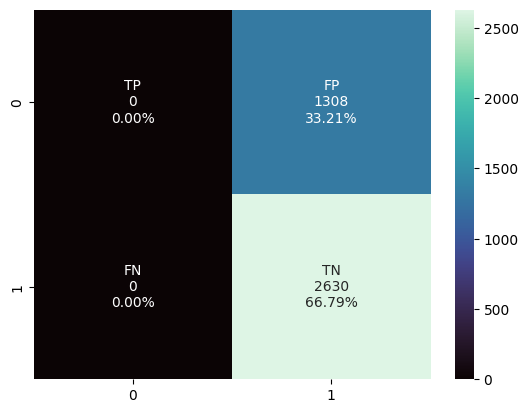

In [246]:
m6_lr_result = printAccuracy(y_test, m6_y_pred_lr)

#### Model 7 : Decision Tree

In [247]:
m7_dt, m7_y_pred_dt  = dTMaker (X_train=X_train_reduced2, y_train=y_train, X_test=X_test_reduced2)

[2 2 1 ... 2 2 1]
     TN   FP   FN   TP  Accuracy  Sensitivity: TPR  Specificity: TNR
0  2423  871  207  437  0.726257          0.334098          0.921293
Log loss = 11.97184
AUC = 0.62770
Average Precision = 0.28705

Using 0.5 as threshold:
Accuracy = 0.72626
Precision = 0.67857
Recall = 0.33410
F1 score = 0.44775

Classification Report
              precision    recall  f1-score   support

           1       0.68      0.33      0.45      1308
           2       0.74      0.92      0.82      2630

    accuracy                           0.73      3938
   macro avg       0.71      0.63      0.63      3938
weighted avg       0.72      0.73      0.70      3938

Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is 'specificity'.


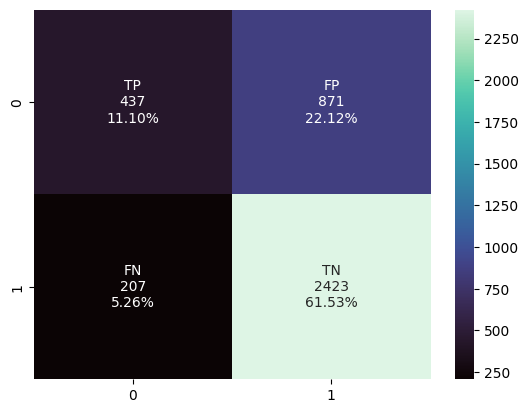

In [248]:
m7_dt_result = printAccuracy(y_test, m7_y_pred_dt)

#### Model 8: KNN

In [164]:
m8_knn, m8_y_pred_knn  = kNNMaker(X_train=X_train_reduced2, y_train=y_train, X_test=X_test_reduced2)

[2 2 1 ... 2 2 1]
     TN   FP   FN   TP  Accuracy  Sensitivity: TPR  Specificity: TNR
0  2201  676  429  632  0.719401           0.48318          0.836882
Log loss = 11.97184
AUC = 0.66003
Average Precision = 0.28192

Using 0.5 as threshold:
Accuracy = 0.71940
Precision = 0.59566
Recall = 0.48318
F1 score = 0.53356

Classification Report
              precision    recall  f1-score   support

           1       0.60      0.48      0.53      1308
           2       0.77      0.84      0.80      2630

    accuracy                           0.72      3938
   macro avg       0.68      0.66      0.67      3938
weighted avg       0.71      0.72      0.71      3938

Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is 'specificity'.


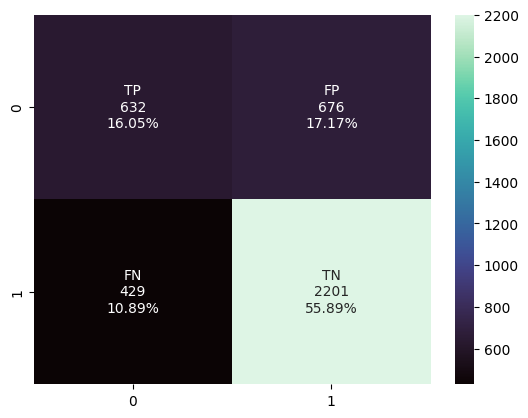

In [165]:
m8_knn_result = printAccuracy(y_test, m8_y_pred_knn)

#### Model 9: SVP

In [166]:
m9_svm, m9_y_pred_svm  = sVMMaker(X_train=X_train_reduced2, y_train=y_train, X_test=X_test_reduced2)

[2 2 1 ... 2 2 1]
     TN   FP   FN   TP  Accuracy  Sensitivity: TPR  Specificity: TNR
0  2325  693  305  615  0.746572          0.470183           0.88403
Log loss = 11.97184
AUC = 0.67711
Average Precision = 0.27783

Using 0.5 as threshold:
Accuracy = 0.74657
Precision = 0.66848
Recall = 0.47018
F1 score = 0.55206

Classification Report
              precision    recall  f1-score   support

           1       0.67      0.47      0.55      1308
           2       0.77      0.88      0.82      2630

    accuracy                           0.75      3938
   macro avg       0.72      0.68      0.69      3938
weighted avg       0.74      0.75      0.73      3938

Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is 'specificity'.


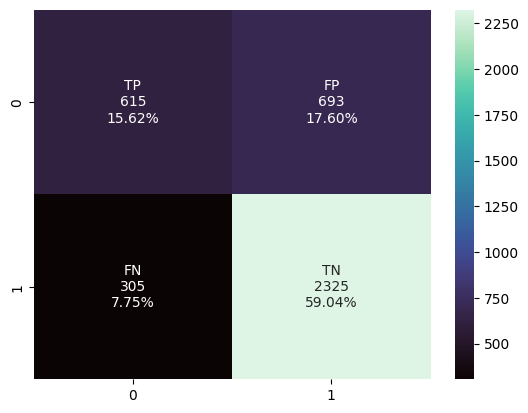

In [167]:
m9_svm_result = printAccuracy(y_test, m9_y_pred_svm)

#### Model 10: MLP

In [249]:
m10_mlp , m10_y_pred_mlp  = mLPMaker(X_train=X_train_reduced2, y_train=y_train, X_test=X_test_reduced2)

/home/harnold/github/2018_BRFSS_survey_data_anlaysis/env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


[2 2 1 ... 2 2 1]
     TN   FP   FN   TP  Accuracy  Sensitivity: TPR  Specificity: TNR
0  2274  654  356  654  0.743525               0.5          0.864639
Log loss = 11.97184
AUC = 0.68232
Average Precision = 0.27775

Using 0.5 as threshold:
Accuracy = 0.74352
Precision = 0.64752
Recall = 0.50000
F1 score = 0.56428

Classification Report
              precision    recall  f1-score   support

           1       0.65      0.50      0.56      1308
           2       0.78      0.86      0.82      2630

    accuracy                           0.74      3938
   macro avg       0.71      0.68      0.69      3938
weighted avg       0.73      0.74      0.73      3938

Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is 'specificity'.


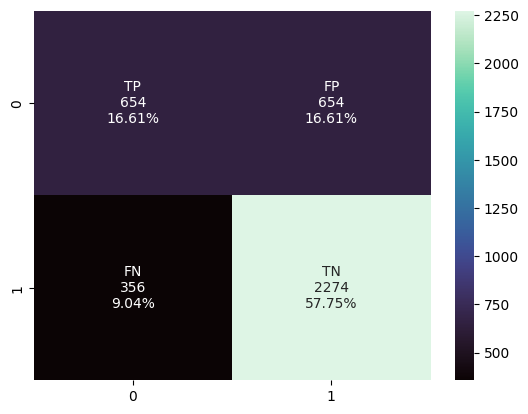

In [169]:
m10_dt_result = printAccuracy(y_test, m10_y_pred_mlp)

## Iteration 3 

### Attribute Selection Method : Random Forest Classifier

In [170]:
def randomForestSelect(X_train,X_test,y_train, max_features):
    sel = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state=0,max_features=20))
    sel.fit(X_train, y_train.values.ravel())
    selected_feat= X_train.columns[(sel.get_support())]
    len(selected_feat)
    #print(selected_feat)
    X_train_selected = X_train[selected_feat]
    X_test_selected = X_test[selected_feat]
    print(X_test_selected.head())
    return X_train_selected, X_test_selected

In [171]:
# reduced data set 3
X_train_reduced3 , X_test_reduced3= randomForestSelect(X_train=X_train,X_test=X_test,y_train= y_train,max_features=20)
print("new size X_train",X_train_reduced3.shape )
print("new size X_train",X_test_reduced3.shape )
print("selected column names",X_train_reduced3.columns)

       employ1  income2  weight2  height3  pneuvac4  alcday5  diffwalk  \
10172      5.0      7.0    130.0    502.0       1.0    101.0       2.0   
10322      1.0      7.0    170.0    508.0       2.0    888.0       2.0   
9195       7.0     99.0    145.0    501.0       1.0    215.0       2.0   
357        2.0      7.0    200.0    511.0       2.0    201.0       2.0   
4352       1.0      8.0    180.0    507.0       2.0    888.0       2.0   

            x.psu  physhlth  menthlth  ...  x.incomg  x.drnkwek  drocdy3.  \
10172  2018001646        88        88  ...         5      99900        14   
10322  2018002740        88        88  ...         5          0         0   
9195   2018000479        30        88  ...         9        350        50   
357    2018004168        88        88  ...         5         47         3   
4352   2018004398        88        88  ...         9      99900       900   

         x.llcpwt2     x.llcpwt  x.wt2rake  x.ststr    x.strwt  x.phys14d  \
10172   462.325

### Model Creation : Initializing 5 models

#### Model 11 : Logistic Regression

In [250]:
m11_lr, m11_y_pred_lr= lRMaker(X_train=X_train_reduced3, y_train=y_train, X_test=X_test_reduced3)

[2 2 2 ... 2 2 2]


[2 2 2 ... 2 2 2]
     TN    FP  FN  TP  Accuracy  Sensitivity: TPR  Specificity: TNR
0  2630  1308   0   0  0.667852               0.0               1.0
Log loss = 11.97184
AUC = 0.50000
Average Precision = 0.33215

Using 0.5 as threshold:
Accuracy = 0.66785
Precision = 0.00000
Recall = 0.00000
F1 score = 0.00000

Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1308
           2       0.67      1.00      0.80      2630

    accuracy                           0.67      3938
   macro avg       0.33      0.50      0.40      3938
weighted avg       0.45      0.67      0.53      3938

Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is 'specificity'.


/home/harnold/github/2018_BRFSS_survey_data_anlaysis/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/harnold/github/2018_BRFSS_survey_data_anlaysis/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/harnold/github/2018_BRFSS_survey_data_anlaysis/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

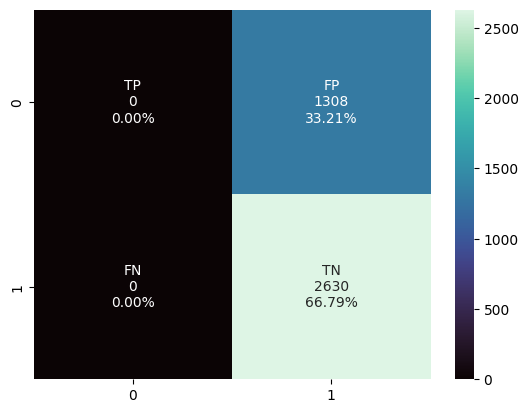

In [251]:
m11_lr_result = printAccuracy(y_test, m11_y_pred_lr)

#### Model 12: Decision Tree

In [174]:
m12_dt, m12_y_pred_dt  = dTMaker(X_train=X_train_reduced3, y_train=y_train, X_test=X_test_reduced3)

[2 2 1 ... 2 2 1]
     TN   FP   FN   TP  Accuracy  Sensitivity: TPR  Specificity: TNR
0  2275  656  355  652  0.743271          0.498471          0.865019
Log loss = 11.97184
AUC = 0.68174
Average Precision = 0.27782

Using 0.5 as threshold:
Accuracy = 0.74327
Precision = 0.64747
Recall = 0.49847
F1 score = 0.56328

Classification Report
              precision    recall  f1-score   support

           1       0.65      0.50      0.56      1308
           2       0.78      0.87      0.82      2630

    accuracy                           0.74      3938
   macro avg       0.71      0.68      0.69      3938
weighted avg       0.73      0.74      0.73      3938

Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is 'specificity'.


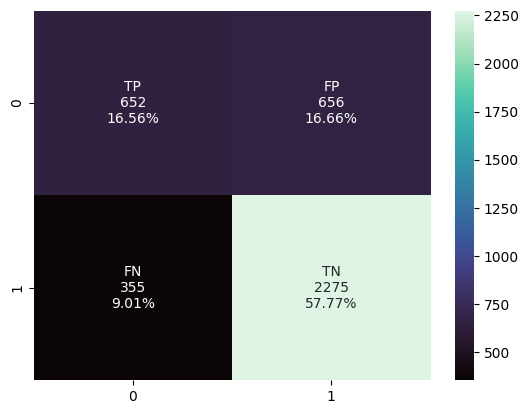

In [175]:
m12_dt_result = printAccuracy(y_test, m12_y_pred_dt)

#### Model 13: KNN

In [176]:
m13_knn, m13_y_pred_knn  = kNNMaker(X_train=X_train_reduced3, y_train=y_train, X_test=X_test_reduced3)

[2 2 1 ... 2 2 1]
     TN   FP   FN   TP  Accuracy  Sensitivity: TPR  Specificity: TNR
0  2237  667  393  641  0.730828          0.490061           0.85057
Log loss = 11.97184
AUC = 0.67032
Average Precision = 0.27990

Using 0.5 as threshold:
Accuracy = 0.73083
Precision = 0.61992
Recall = 0.49006
F1 score = 0.54740

Classification Report
              precision    recall  f1-score   support

           1       0.62      0.49      0.55      1308
           2       0.77      0.85      0.81      2630

    accuracy                           0.73      3938
   macro avg       0.70      0.67      0.68      3938
weighted avg       0.72      0.73      0.72      3938

Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is 'specificity'.


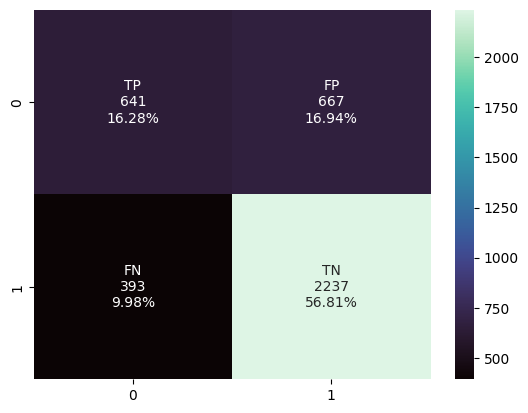

In [177]:
m13_knn_result = printAccuracy(y_test, m13_y_pred_knn)

#### Model 14: SVM 

In [178]:
m14_svm, m14_y_pred_svm  = sVMMaker(X_train=X_train_reduced3, y_train=y_train, X_test=X_test_reduced3)

[2 2 1 ... 2 2 1]
     TN   FP   FN   TP  Accuracy  Sensitivity: TPR  Specificity: TNR
0  2347  694  283  614  0.751905          0.469419          0.892395
Log loss = 11.97184
AUC = 0.68091
Average Precision = 0.27700

Using 0.5 as threshold:
Accuracy = 0.75190
Precision = 0.68450
Recall = 0.46942
F1 score = 0.55692

Classification Report
              precision    recall  f1-score   support

           1       0.68      0.47      0.56      1308
           2       0.77      0.89      0.83      2630

    accuracy                           0.75      3938
   macro avg       0.73      0.68      0.69      3938
weighted avg       0.74      0.75      0.74      3938

Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is 'specificity'.


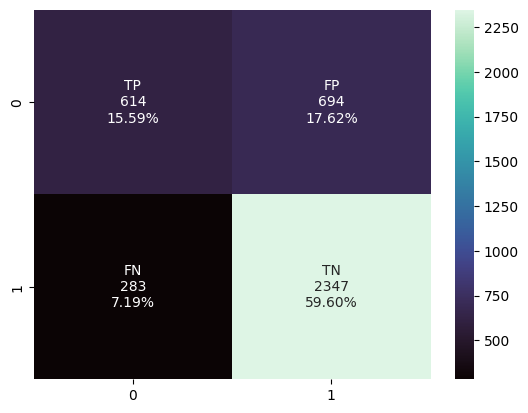

In [179]:
m14_svm_result = printAccuracy(y_test, m14_y_pred_svm)

#### Model 15: MLP

In [180]:
m15_mlp , m15_y_pred_mlp  = mLPMaker(X_train=X_train_reduced3, y_train=y_train, X_test=X_test_reduced3)

/home/harnold/github/2018_BRFSS_survey_data_anlaysis/env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


[2 2 1 ... 2 2 1]
     TN   FP   FN   TP  Accuracy  Sensitivity: TPR  Specificity: TNR
0  2273  664  357  644  0.740731          0.492355          0.864259
Log loss = 11.97184
AUC = 0.67831
Average Precision = 0.27830

Using 0.5 as threshold:
Accuracy = 0.74073
Precision = 0.64336
Recall = 0.49235
F1 score = 0.55782

Classification Report
              precision    recall  f1-score   support

           1       0.64      0.49      0.56      1308
           2       0.77      0.86      0.82      2630

    accuracy                           0.74      3938
   macro avg       0.71      0.68      0.69      3938
weighted avg       0.73      0.74      0.73      3938

Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is 'specificity'.


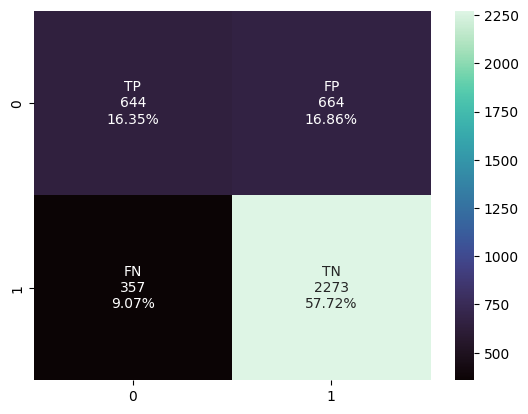

In [181]:
m15_mlp_result = printAccuracy(y_test, m15_y_pred_mlp)

## Iteration 4

### Attribute selection method: Forward Feature Selection, this method is a cost expensive method and it takes a while to compute therefore we will reduce the feature amount to 7

This model did not selected good pairs of attributes

In [182]:
def sfsFeatures(X_train,X_test, y_train):
    model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=0)
    sfs1 = SFS(model, k_features=7, forward=True, floating=False, verbose=2,scoring='accuracy',n_jobs=-1,cv=5)
    sfs1 = sfs1.fit(X_train, y_train.values.ravel())
    features = list(sfs1.k_feature_names_)
    X_train_reduced =X_train[features]
    X_test_reduced= X_test[features]
    #pd.DataFrame.from_dict(sfs1.get_metric_dict()).T
    return X_train_reduced, X_test_reduced

In [183]:
# reduced data set 4
X_train_reduced4 , X_test_reduced4= sfsFeatures(X_train=X_train,X_test=X_test,y_train= y_train)
print("new size X_train",X_train_reduced4.shape )
print("new size X_train",X_test_reduced4.shape )
print("selected column names",X_train_reduced4.columns)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 107 out of 107 | elapsed:    1.7s finished

[2022-12-12 21:06:17] Features: 1/7 -- score: 0.7292057535959975[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed:    1.0s finished

[2022-12-12 21:06:18] Features: 2/7 -- score: 0.7295809881175735[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    1.2s finished

[2022-12-12 21:06:19] Features: 3/7 -- score: 0.7307066916823015[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  89 out of 1

new size X_train (7995, 7)
new size X_train (3938, 7)
selected column names Index(['flushot6', 'hivrisk5', 'diffwalk', 'chcscncr', 'qstver', 'qstlang',
       'x.strwt'],
      dtype='object')


[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    8.6s finished

[2022-12-12 21:06:38] Features: 7/7 -- score: 0.7333333333333333

In [184]:
print("feature names",  X_train_reduced4.columns)

feature names Index(['flushot6', 'hivrisk5', 'diffwalk', 'chcscncr', 'qstver', 'qstlang',
       'x.strwt'],
      dtype='object')


### Model Creation : Initializing 5 models

#### Model 16 : Logistic Regression

In [185]:
m16_lr, m16_y_pred_lr= lRMaker(X_train=X_train_reduced4, y_train=y_train, X_test=X_test_reduced4)

[2 2 1 ... 2 2 1]


[2 2 1 ... 2 2 1]
     TN   FP   FN   TP  Accuracy  Sensitivity: TPR  Specificity: TNR
0  2444  858  186  450  0.734891          0.344037          0.929278
Log loss = 11.97184
AUC = 0.63666
Average Precision = 0.28472

Using 0.5 as threshold:
Accuracy = 0.73489
Precision = 0.70755
Recall = 0.34404
F1 score = 0.46296

Classification Report
              precision    recall  f1-score   support

           1       0.71      0.34      0.46      1308
           2       0.74      0.93      0.82      2630

    accuracy                           0.73      3938
   macro avg       0.72      0.64      0.64      3938
weighted avg       0.73      0.73      0.70      3938

Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is 'specificity'.


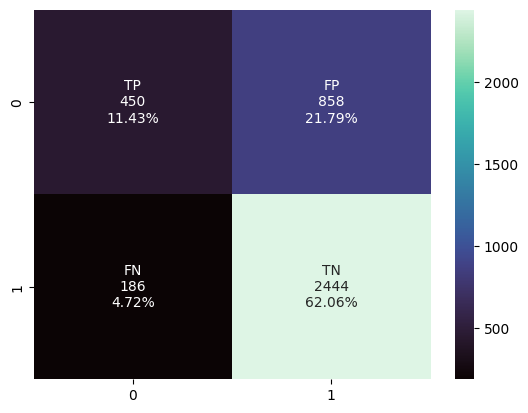

In [186]:
m16_lr_result = printAccuracy(y_test, m16_y_pred_lr)

#### Model 17 :Decision Tree

In [187]:
m17_dt, m17_y_pred_dt  = dTMaker(X_train=X_train_reduced4, y_train=y_train, X_test=X_test_reduced4)

[2 2 2 ... 2 2 1]
     TN   FP   FN   TP  Accuracy  Sensitivity: TPR  Specificity: TNR
0  2462  879  168  429  0.734129          0.327982          0.936122
Log loss = 11.97184
AUC = 0.63205
Average Precision = 0.28574

Using 0.5 as threshold:
Accuracy = 0.73413
Precision = 0.71859
Recall = 0.32798
F1 score = 0.45039

Classification Report
              precision    recall  f1-score   support

           1       0.72      0.33      0.45      1308
           2       0.74      0.94      0.82      2630

    accuracy                           0.73      3938
   macro avg       0.73      0.63      0.64      3938
weighted avg       0.73      0.73      0.70      3938

Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is 'specificity'.


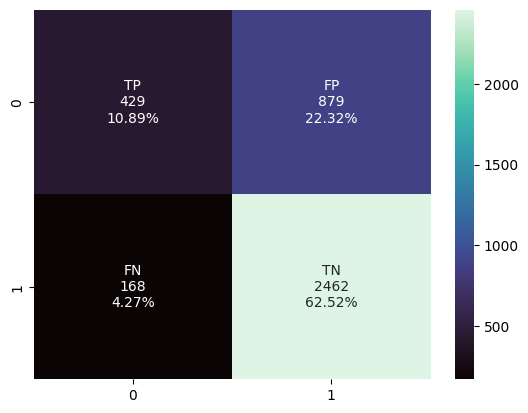

In [188]:
m17_dt_result = printAccuracy(y_test, m17_y_pred_dt)

#### Model 18 : KNN

In [252]:
m18_knn, m18_y_pred_knn  = kNNMaker(X_train=X_train_reduced4, y_train=y_train, X_test=X_test_reduced4)

[2 2 2 ... 2 2 1]
     TN   FP   FN   TP  Accuracy  Sensitivity: TPR  Specificity: TNR
0  2298  772  332  536  0.719655          0.409786          0.873764
Log loss = 11.97184
AUC = 0.64178
Average Precision = 0.28453

Using 0.5 as threshold:
Accuracy = 0.71965
Precision = 0.61751
Recall = 0.40979
F1 score = 0.49265

Classification Report
              precision    recall  f1-score   support

           1       0.62      0.41      0.49      1308
           2       0.75      0.87      0.81      2630

    accuracy                           0.72      3938
   macro avg       0.68      0.64      0.65      3938
weighted avg       0.71      0.72      0.70      3938

Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is 'specificity'.


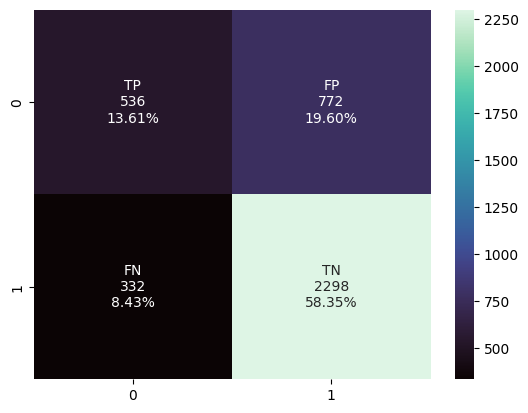

In [190]:
m18_knn_result = printAccuracy(y_test, m18_y_pred_knn)

#### Model 19 : SVM 

In [191]:
m19_svm, m19_y_pred_svm  = sVMMaker(X_train=X_train_reduced4, y_train=y_train, X_test=X_test_reduced4)

[2 2 1 ... 2 2 1]
     TN   FP   FN   TP  Accuracy  Sensitivity: TPR  Specificity: TNR
0  2425  836  205  472  0.735653          0.360856          0.922053
Log loss = 11.97184
AUC = 0.64145
Average Precision = 0.28371

Using 0.5 as threshold:
Accuracy = 0.73565
Precision = 0.69719
Recall = 0.36086
F1 score = 0.47557

Classification Report
              precision    recall  f1-score   support

           1       0.70      0.36      0.48      1308
           2       0.74      0.92      0.82      2630

    accuracy                           0.74      3938
   macro avg       0.72      0.64      0.65      3938
weighted avg       0.73      0.74      0.71      3938

Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is 'specificity'.


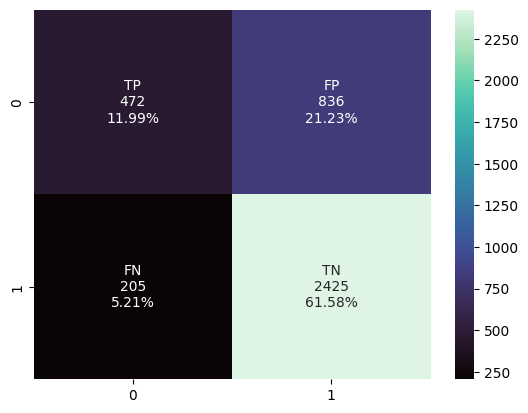

In [192]:
m19_svm_result = printAccuracy(y_test, m19_y_pred_svm)

#### Model 20: MLP

In [193]:
m20_mlp , m20_y_pred_mlp  = mLPMaker(X_train=X_train_reduced4, y_train=y_train, X_test=X_test_reduced4)

/home/harnold/github/2018_BRFSS_survey_data_anlaysis/env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


[2 2 1 ... 2 2 1]
     TN    FP   FN   TP  Accuracy  Sensitivity: TPR  Specificity: TNR
0  2514  1044  116  264  0.705434          0.201835          0.955894
Log loss = 11.97184
AUC = 0.57886
Average Precision = 0.30124

Using 0.5 as threshold:
Accuracy = 0.70543
Precision = 0.69474
Recall = 0.20183
F1 score = 0.31280

Classification Report
              precision    recall  f1-score   support

           1       0.69      0.20      0.31      1308
           2       0.71      0.96      0.81      2630

    accuracy                           0.71      3938
   macro avg       0.70      0.58      0.56      3938
weighted avg       0.70      0.71      0.65      3938

Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is 'specificity'.


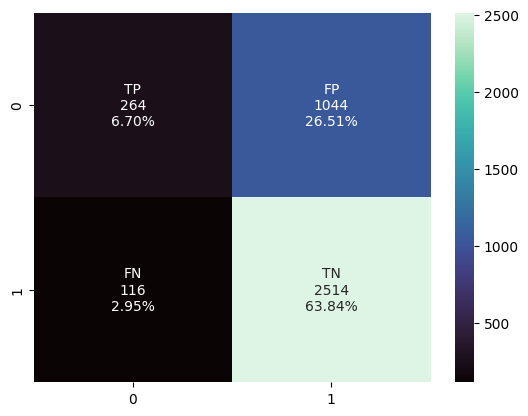

In [194]:
m20_mlp_result = printAccuracy(y_test, m20_y_pred_mlp)

## Iteration 5 

### Attribute selection Method: Feature drop and manual elimination based on given info

In [195]:

def dropFeatureAccr(x_train,x_test, y_train, y_test):
    accuracy_featuresDrop = []
    column_name= list(x_train.columns.values.tolist())
    for column in range(len(column_name)):
        x_train_modified = x_train.drop(columns=[column_name[column]])
        x_test_modified = x_test.drop(columns=[column_name[column]])
        log_reg_classifier = LogisticRegression(solver='lbfgs', max_iter=2000,random_state=16)
        log_reg_classifier.fit(x_train_modified,y_train.values.ravel())
        y_pred_mod = log_reg_classifier.predict(x_test_modified)
        accuracy_featuresDrop.append(accuracy_score(y_test,y_pred_mod))      
    dictionary_feature_drop = dict(zip(column_name, accuracy_featuresDrop))        
    return dictionary_feature_drop


{'x.age80': 0.6627729812087354, 'x.ageg5yr': 0.7148298628745556, 'x.age.g': 0.6945149822244794, 'employ1': 0.6937531742001015, 'diffwalk': 0.6945149822244794, 'x.hcvu651': 0.6950228542407313, 'genhlth': 0.6945149822244794, 'x.age65yr': 0.7158456069070595, 'marital': 0.6947689182326053, 'x.phys14d': 0.6947689182326053, 'physhlth': 0.6678517013712545, 'rmvteth4': 0.6947689182326053, 'pneuvac4': 0.7148298628745556, 'x.rfhlth': 0.6945149822244794, 'x.ststr': 0.7473336719146775, 'x.exteth3': 0.6945149822244794, 'persdoc2': 0.7150837988826816, 'qstver': 0.712798374809548, 'x.strwt': 0.6853732859319451, 'chccopd1': 0.6945149822244794}
max effect 
feature x.ststr
accuracy score  0.7473336719146775
when we drop it the accurasy score went down effect
feature x.age80
accuracy score  0.6627729812087354


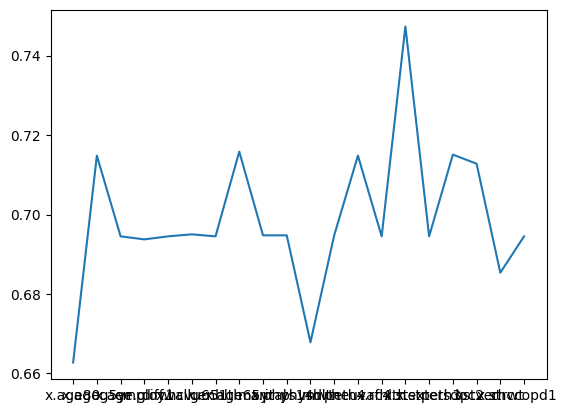

In [196]:
logisticRegDrop =dropFeatureAccr(x_train= X_train_reduced1,y_train= y_train, x_test= X_test_reduced1, y_test = y_test) #X_train_reduced1 , X_test_reduced1
print(logisticRegDrop)
print("max effect ")
print("feature", max(logisticRegDrop, key=logisticRegDrop.get))
print("accuracy score ", logisticRegDrop.get(max(logisticRegDrop, key=logisticRegDrop.get)))
print("when we drop it the accurasy score went down effect")
print("feature",min(logisticRegDrop, key=logisticRegDrop.get))
print("accuracy score ", logisticRegDrop.get(min(logisticRegDrop, key=logisticRegDrop.get)))


lists = logisticRegDrop.items() # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

In [197]:
features_dropped_box= ['x.ageg5yr', 'x.age65yr','x.ststr','x.strwt', 'x.age.g']
X_train_reduced5= X_train_reduced1.loc[ :,  ~X_train_reduced1.columns.isin(features_dropped_box)]

X_test_reduced5 = X_test_reduced1.loc[ :,  ~X_test_reduced1.columns.isin(features_dropped_box)]
X_train_reduced5.columns


Index(['x.age80', 'employ1', 'diffwalk', 'x.hcvu651', 'genhlth', 'marital',
       'x.phys14d', 'physhlth', 'rmvteth4', 'pneuvac4', 'x.rfhlth',
       'x.exteth3', 'persdoc2', 'qstver', 'chccopd1'],
      dtype='object')

### Model Creation : Initializing 5 models

#### Model 21 : LR

In [198]:
m21_lr, m21_y_pred_lr= lRMaker(X_train = X_train_reduced5, y_train=y_train, X_test =X_test_reduced5)

[2 2 1 ... 2 2 1]


[2 2 1 ... 2 2 1]
     TN   FP   FN   TP  Accuracy  Sensitivity: TPR  Specificity: TNR
0  2276  647  354  661   0.74581          0.505352          0.865399
Log loss = 11.97184
AUC = 0.68538
Average Precision = 0.27734

Using 0.5 as threshold:
Accuracy = 0.74581
Precision = 0.65123
Recall = 0.50535
F1 score = 0.56909

Classification Report
              precision    recall  f1-score   support

           1       0.65      0.51      0.57      1308
           2       0.78      0.87      0.82      2630

    accuracy                           0.75      3938
   macro avg       0.71      0.69      0.69      3938
weighted avg       0.74      0.75      0.74      3938

Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is 'specificity'.


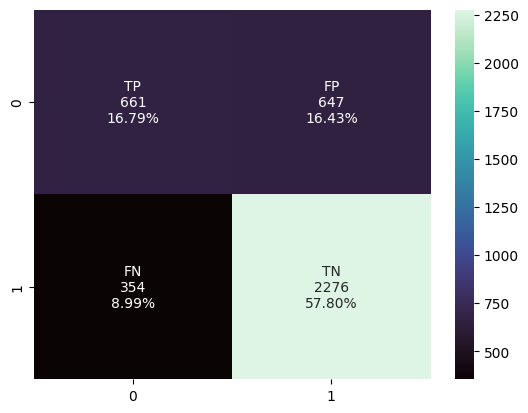

In [199]:
m21_lr_result = printAccuracy(y_test, m21_y_pred_lr)

#### Model 22 : Decision Tree

In [200]:
m22_dt, m22_y_pred_dt  = dTMaker(X_train=X_train_reduced5, y_train=y_train, X_test=X_test_reduced5)

[2 2 1 ... 2 2 1]
     TN   FP   FN   TP  Accuracy  Sensitivity: TPR  Specificity: TNR
0  2275  655  355  653  0.743525          0.499235          0.865019
Log loss = 11.97184
AUC = 0.68213
Average Precision = 0.27777

Using 0.5 as threshold:
Accuracy = 0.74352
Precision = 0.64782
Recall = 0.49924
F1 score = 0.56390

Classification Report
              precision    recall  f1-score   support

           1       0.65      0.50      0.56      1308
           2       0.78      0.87      0.82      2630

    accuracy                           0.74      3938
   macro avg       0.71      0.68      0.69      3938
weighted avg       0.73      0.74      0.73      3938

Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is 'specificity'.


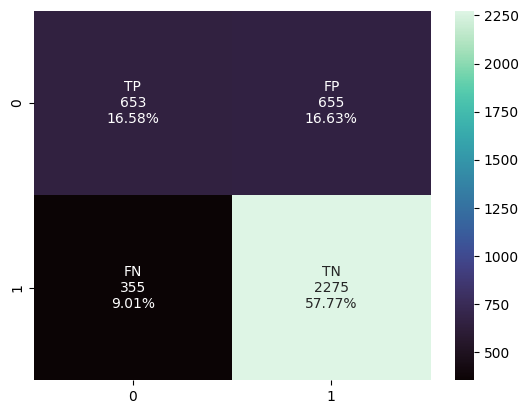

In [201]:
m22_lr_result = printAccuracy(y_test, m22_y_pred_dt)

#### Model 23 : KNN

In [202]:
m23_knn, m23_y_pred_knn  = kNNMaker(X_train=X_train_reduced5, y_train=y_train, X_test=X_test_reduced5)

[2 2 1 ... 2 1 1]
     TN   FP   FN   TP  Accuracy  Sensitivity: TPR  Specificity: TNR
0  2189  605  441  703  0.734383          0.537462          0.832319
Log loss = 11.97184
AUC = 0.68489
Average Precision = 0.27867

Using 0.5 as threshold:
Accuracy = 0.73438
Precision = 0.61451
Recall = 0.53746
F1 score = 0.57341

Classification Report
              precision    recall  f1-score   support

           1       0.61      0.54      0.57      1308
           2       0.78      0.83      0.81      2630

    accuracy                           0.73      3938
   macro avg       0.70      0.68      0.69      3938
weighted avg       0.73      0.73      0.73      3938

Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is 'specificity'.


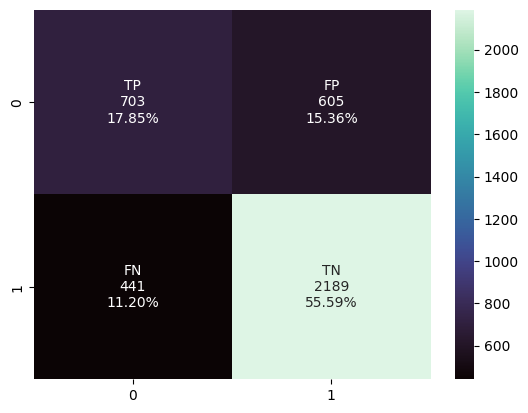

In [203]:
m23_knn_result = printAccuracy(y_test, m23_y_pred_knn)

#### Model 24 : SVM

In [204]:
m24_svm, m24_y_pred_svm  = sVMMaker(X_train=X_train_reduced5, y_train=y_train, X_test=X_test_reduced5)

[2 2 1 ... 2 2 1]
     TN   FP   FN   TP  Accuracy  Sensitivity: TPR  Specificity: TNR
0  2345  685  285  623  0.753682            0.4763          0.891635
Log loss = 11.97184
AUC = 0.68397
Average Precision = 0.27660

Using 0.5 as threshold:
Accuracy = 0.75368
Precision = 0.68612
Recall = 0.47630
F1 score = 0.56227

Classification Report
              precision    recall  f1-score   support

           1       0.69      0.48      0.56      1308
           2       0.77      0.89      0.83      2630

    accuracy                           0.75      3938
   macro avg       0.73      0.68      0.70      3938
weighted avg       0.74      0.75      0.74      3938

Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is 'specificity'.


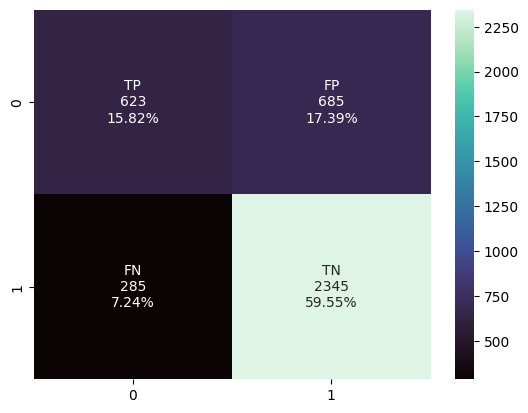

In [205]:
m24_svm_result = printAccuracy(y_test, m24_y_pred_svm)

#### Model 25 : MLP

In [253]:
m25_mlp , m25_y_pred_mlp  = mLPMaker(X_train=X_train_reduced5, y_train=y_train, X_test=X_test_reduced5)

/home/harnold/github/2018_BRFSS_survey_data_anlaysis/env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


[2 2 1 ... 2 2 1]
     TN   FP   FN   TP  Accuracy  Sensitivity: TPR  Specificity: TNR
0  2317  670  313  638  0.750381          0.487768          0.880989
Log loss = 11.97184
AUC = 0.68438
Average Precision = 0.27691

Using 0.5 as threshold:
Accuracy = 0.75038
Precision = 0.67087
Recall = 0.48777
F1 score = 0.56485

Classification Report
              precision    recall  f1-score   support

           1       0.67      0.49      0.56      1308
           2       0.78      0.88      0.82      2630

    accuracy                           0.75      3938
   macro avg       0.72      0.68      0.69      3938
weighted avg       0.74      0.75      0.74      3938

Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is 'specificity'.


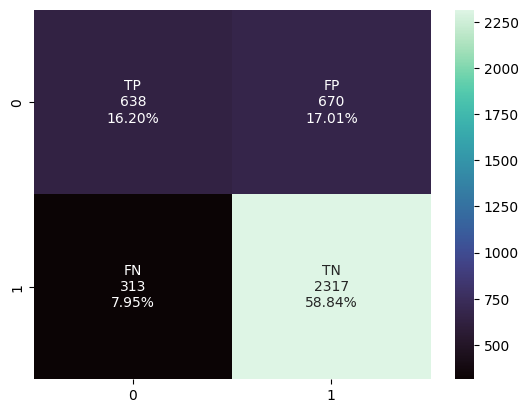

In [254]:
m25_mlp_result = printAccuracy(y_test, m25_y_pred_mlp)

## Saving Best Feature Data

In [256]:
X_train_csv2= X_train_reduced5.copy()
X_train_csv2["havarth3"]= y_train.copy()
X_train_csv2.head() 
X_train_csv2.to_csv("HicranArnold_best_train.csv", index=False)


X_test_csv2= X_test_reduced5.copy()
X_test_csv2["havarth3"]= y_test.copy()
X_test_csv2.to_csv("HicranArnold_best_test.csv", index=False)


## Model Comparison 

In [209]:
y_pred_box = [m1_y_pred_lr, m2_y_pred_dt, m3_y_pred_knn, m4_y_pred_svm, m5_y_pred_mlp, m6_y_pred_lr, m7_y_pred_dt, m8_y_pred_knn, m9_y_pred_svm, m10_y_pred_mlp, m11_y_pred_lr, m12_y_pred_dt, m13_y_pred_knn, m14_y_pred_svm, m15_y_pred_mlp, m16_y_pred_lr, m17_y_pred_dt, m18_y_pred_knn, m19_y_pred_svm, m20_y_pred_mlp, m21_y_pred_lr, m22_y_pred_dt, m23_y_pred_knn, m24_y_pred_svm, m25_y_pred_mlp]
labels = ["m1", "m2", "m3", "m4" , "m5", "m6" , 'm7', "m8", "m9", "m10", "m11", "m12", "m13", "m14", "m15", "m16","m17", "m18", "m19", 'm20', "m21", "m22", "m23", "m24","m25"]


def accuracyRatesCollector(y_test, y_pred_box,labels ):
    df_box = []
    for item in range(len(y_pred_box)): 
        y_pred= y_pred_box[item ]
        accuracy_rate = round(accuracy_score(y_test, y_pred),2)
        error_rate = 1- accuracy_rate
        sensitivity_recall= round(recall_score(y_test, y_pred),2)
        precision_rate = round(precision_score(y_test, y_pred),2)
        model_name = labels[item]
        my_matrix_values_1 = {"modelName":model_name, "accuracy":accuracy_rate, "error_rate":error_rate, "sensitivity_recall":sensitivity_recall,"precision_rate":precision_rate}
        df=  pd.DataFrame(my_matrix_values_1 , index=[0])
        df_box.append(df)
    combined_df = pd.concat(df_box)
    return combined_df

In [210]:
accuracy_mat = accuracyRatesCollector(y_test=y_test, y_pred_box=y_pred_box, labels= labels)
accuracy_mat

/home/harnold/github/2018_BRFSS_survey_data_anlaysis/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/harnold/github/2018_BRFSS_survey_data_anlaysis/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,modelName,accuracy,error_rate,sensitivity_recall,precision_rate
0,m1,0.69,0.31,0.40,0.56
0,m2,0.74,0.26,0.50,0.65
0,m3,0.73,0.27,0.52,0.61
0,m4,0.75,0.25,0.47,0.69
0,m5,0.74,0.26,0.48,0.66
0,m6,0.67,0.33,0.00,0.00
0,m7,0.73,0.27,0.33,0.68
0,m8,0.72,0.28,0.48,0.60
0,m9,0.75,0.25,0.47,0.67
0,m10,0.74,0.26,0.50,0.65


***Plot Error Rate***

In [211]:
#accuracy_mat.T


<AxesSubplot: xlabel='modelName'>

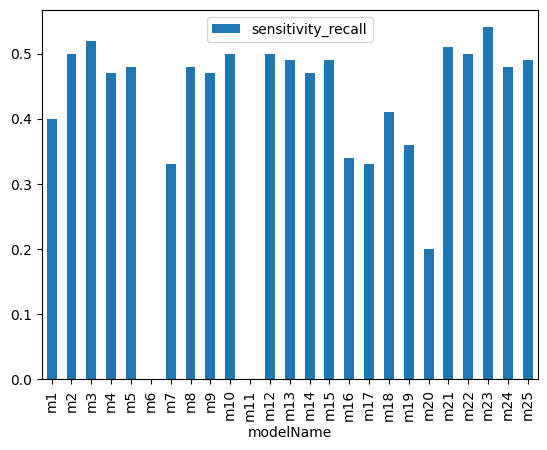

In [212]:
accuracy_mat.plot.bar(x='modelName', y='sensitivity_recall')


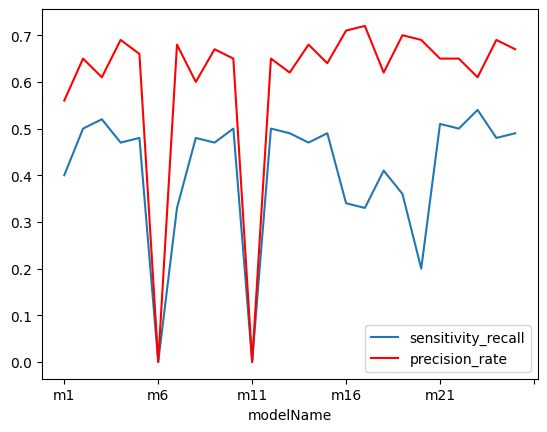

In [260]:
import matplotlib.pyplot as plt
import pandas as pd

ax = plt.gca()

accuracy_mat.plot(kind='line',x='modelName',y='sensitivity_recall',ax=ax)
accuracy_mat.plot(kind='line',x='modelName',y='precision_rate', color='red', ax=ax)

plt.show()